In [1]:
import calendar as cld
def fn(date_str):
    yr=date_str.split('-')[0][2:]
    mth=int(date_str.split('-')[1])
    return cld.month_name[mth][:3]+' '+yr

In [3]:
import matplotlib.pyplot as plt
def gen_line_graph(d): 
    x = list(range(len(d)))
    y = list(d.values())
    plt.figure(figsize=(14, 4))
    ax = plt.axes() 
    ax.set_facecolor('#e8e8e8')
    plt.plot(x, y, marker='o', markersize=4, markeredgecolor='black')
    plt.xticks(x, d.keys(), rotation=748)
    max_key = y.index(max(y))
    plt.axvline(x=max_key, linestyle='--', color='red')
    plt.grid(True, color='lightgray', linestyle='--', linewidth=1) 
    return plt.show

In [5]:
import pandas as pd
df=pd.read_csv('./owid-covid-data.csv')
df=df[['date', 'new_cases']]

In [24]:
df['date_mod']=df['date'].apply(fn)

In [19]:
cases = df.groupby('date_mod')['new_cases'].sum()
d1=cases.to_dict()

In [25]:
from datetime import datetime, timedelta
def gen_str(start_year=2020, start_month=1, end_year=2023, end_month=3):
    start_date = datetime(start_year, start_month, 1)
    end_date = datetime(end_year, end_month, 1)
    l=[]
    while start_date <= end_date:
        l.append(start_date.strftime('%b %y'))
        start_date += timedelta(days=32)
        start_date = start_date.replace(day=1)
    return l

l=gen_str()
d={}
for i in l:
    d[i]=0

for i in d1.keys():
    d[i]=d1[i]

<function matplotlib.pyplot.show(close=None, block=None)>

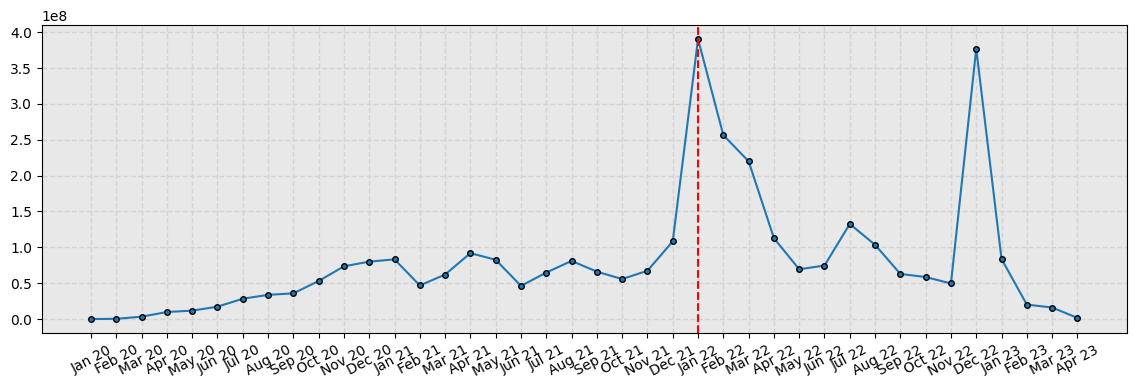

In [27]:
gen_line_graph(d)

In [28]:
pd.DataFrame(d, index=[0]).to_csv('owid.csv', index=False)